In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
ecalls = pd.read_csv('../data/911_Phone Calls_Derecho.csv')
print(ecalls.shape)
ecalls.head(3)

(1549, 5)


Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0   5/3/2020 16:30  911 Calls     36.247802     -86.716847   
1   5/3/2020 16:30  911 Calls     36.143108     -86.800621   
2   5/3/2020 16:30  911 Calls     36.100516     -87.056329   

      Cell Tower Address  
0        WIRELESS CALLER  
1    1161 21ST AV S - SE  
2  8013 C MCCRORY LN - N

In [3]:
ecalls.columns = ['time', 'calltype', 'lat', 'lng', 'cell_tower_address']
ecalls = ecalls.dropna(subset = ['lat', 'lng'])

In [4]:
type(ecalls)

pandas.core.frame.DataFrame

In [5]:
ecalls['geometry'] = ecalls.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
ecalls.head(3)

time   calltype        lat        lng     cell_tower_address  \
0  5/3/2020 16:30  911 Calls  36.247802 -86.716847        WIRELESS CALLER   
1  5/3/2020 16:30  911 Calls  36.143108 -86.800621    1161 21ST AV S - SE   
2  5/3/2020 16:30  911 Calls  36.100516 -87.056329  8013 C MCCRORY LN - N   

                               geometry  
0          POINT (-86.716847 36.247802)  
1  POINT (-86.80062100000001 36.143108)  
2  POINT (-87.05632900000001 36.100516)

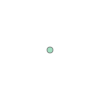

In [6]:
ecalls.loc[0, 'geometry']

In [7]:
print(ecalls.loc[0, 'geometry'])

POINT (-86.716847 36.247802)


In [8]:
ecalls.plot

In [22]:
map = gpd.read_file('../Data/worldmap.geojson')
print(map.crs)
map.head( )

epsg:4326


name                                           geometry
0           Afghanistan  MULTIPOLYGON (((61.21082 35.65007, 62.23065 35...
1                Angola  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...
2               Albania  MULTIPOLYGON (((20.59025 41.85540, 20.46317 41...
3  United Arab Emirates  MULTIPOLYGON (((51.57952 24.24550, 51.75744 24...
4             Argentina  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...

In [23]:
map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
maps_geo = gpd.GeoDataFrame(ecalls, 
                           crs = map.crs, 
                           geometry = ecalls['geometry'])

In [27]:
ecalls = ecalls[['time', 'geometry']]

In [28]:
calls_by_location = gpd.sjoin(maps_geo, map, op = 'within')

In [29]:
calls_by_location.head()

time   calltype        lat        lng     cell_tower_address  \
0  5/3/2020 16:30  911 Calls  36.247802 -86.716847        WIRELESS CALLER   
1  5/3/2020 16:30  911 Calls  36.143108 -86.800621    1161 21ST AV S - SE   
2  5/3/2020 16:30  911 Calls  36.100516 -87.056329  8013 C MCCRORY LN - N   
3  5/3/2020 16:30  911 Calls  36.130021 -86.927819     5758 RIVER RD - SW   
4  5/3/2020 16:31  911 Calls  36.142380 -86.881882   3744B ANNEX AVE - SE   

                     geometry  index_right                      name  
0  POINT (-86.71685 36.24780)          172  United States of America  
1  POINT (-86.80062 36.14311)          172  United States of America  
2  POINT (-87.05633 36.10052)          172  United States of America  
3  POINT (-86.92782 36.13002)          172  United States of America  
4  POINT (-86.88188 36.14238)          172  United States of America

In [30]:
calls_by_location['time'].value_counts()

5/3/2020 16:36    12
5/3/2020 18:04    11
5/3/2020 18:58    11
5/3/2020 18:48    10
5/3/2020 18:37    10
                  ..
5/3/2020 20:23     1
5/3/2020 20:32     1
5/3/2020 22:20     1
5/3/2020 20:36     1
5/4/2020 0:29      1
Name: time, Length: 413, dtype: int64

In [31]:
ecalls_derecho = calls_by_location.loc[calls_by_location['calltype'] == '911 Calls']
ecalls_derecho.shape

(1483, 8)

In [33]:
polygon_derecho = map.loc[map['name'] == 'United States of America']
polygon_derecho.shape

(1, 2)

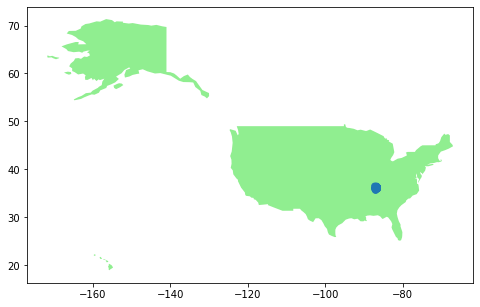

In [34]:
ax = polygon_derecho.plot(figsize = (8, 10), color = 'lightgreen')
ecalls_derecho.plot( ax = ax, column = 'calltype');
plt.show();

In [41]:
center = polygon_derecho.geometry.centroid
print(center)

172    POINT (-112.59944 45.70563)
dtype: geometry


C:\Users\andyr\AppData\Local\Temp/ipykernel_40912/3707398183.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_derecho.geometry.centroid


In [42]:
derecho_center = [center.y, center.x]
print(derecho_center)

[172    45.70563
dtype: float64, 172   -112.599438
dtype: float64]


In [43]:
map_derecho = folium.Map(location = derecho_center, zoom_start = 12)
map_derecho

In [44]:
i = 0
for row_index, row_values in ecalls_derecho.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
time                                5/3/2020 16:30
calltype                                 911 Calls
lat                                      36.247802
lng                                     -86.716847
cell_tower_address                 WIRELESS CALLER
geometry              POINT (-86.716847 36.247802)
index_right                                    172
name                      United States of America
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
time                                        5/3/2020 16:30
calltype                                         911 Calls
lat                                              36.143108
lng                                             -86.800621
cell_tower_address                     1161 21ST AV S - SE
geometry              POINT (-86.80062100000001 36.143108)
index_right                                            172
name                              United States of America
Name: 1, dtype: obje

In [45]:
map_derecho = folium.Map(location = derecho_center, zoom_start = 34)

folium.GeoJson(polygon_derecho).add_to(map_derecho)
for row_index, row_values in ecalls_derecho.iterrows():
    loc = [row_values['geometry'].centroid.y, row_values['geometry'].centroid.x]
    pop = str(row_values['calltype'])
    icon=folium.Icon(color="blue",icon="f1bb", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_derecho)
map_derecho.save('../maps/map_nashville.html')

map_derecho

In [46]:
cluster_map_derecho = folium.Map(location =  derecho_center, zoom_start = 34)

marker_cluster = MarkerCluster().add_to(cluster_map_derecho)

folium.GeoJson(polygon_derecho).add_to(cluster_map_derecho)

for row_index, row_values in ecalls_derecho.iterrows():
    loc = [row_values['geometry'].centroid.y, row_values['geometry'].centroid.x]
    pop = str(row_values['calltype'])
    icon=folium.Icon(color="green",icon="f1bb", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

cluster_map_derecho.save('../maps/clusternashville.html')

cluster_map_derecho